In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
(1869/7043)*100 # minority class

26.536987079369588

In [16]:
df['Churn'] = df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df[['Churn','SeniorCitizen', 'tenure', 'MonthlyCharges']].head()

,Churn,SeniorCitizen,tenure,MonthlyCharges
0,0,0,1,29.85
1,0,0,34,56.95
2,1,0,2,53.85
3,0,0,45,42.30
4,1,0,2,70.70


In [43]:
X = df[['tenure', 'MonthlyCharges']].copy() # independent var
y = df['Churn'].copy() # dependent var

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 10000)

In [22]:
LR.fit(Xtrain, ytrain) # train the model

LogisticRegression(max_iter=10000)

In [23]:
LR.coef_

array([[-0.05347227,  0.03197007]])

In [24]:
train_proba = LR.predict_proba(Xtrain)

In [25]:
train_proba

array([[0.69215153, 0.30784847],
       [0.82354473, 0.17645527],
       [0.74351383, 0.25648617],
       ...,
       [0.84890503, 0.15109497],
       [0.31491988, 0.68508012],
       [0.92538098, 0.07461902]])

In [26]:
test_proba = LR.predict_proba(Xtest)

In [27]:
test_proba # probability of churn or no churn

array([[0.73519713, 0.26480287],
       [0.95873727, 0.04126273],
       [0.98059209, 0.01940791],
       ...,
       [0.88425569, 0.11574431],
       [0.9827923 , 0.0172077 ],
       [0.6924821 , 0.3075179 ]])

In [28]:
train_pred_class = LR.predict(Xtrain)

In [29]:
train_pred_class

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
test_pred_class = LR.predict(Xtest)

In [31]:
test_pred_class

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
train_acc = accuracy_score(train_pred_class, ytrain)

In [33]:
train_acc

0.7822151224707136

In [34]:
test_acc = accuracy_score(test_pred_class, ytest)

In [35]:
test_acc

0.7977288857345636

In [36]:
train_f1 = f1_score(train_pred_class, ytrain)

In [37]:
train_f1

np.float64(0.512127236580517)

In [38]:
test_f1 = f1_score(test_pred_class, ytest)

In [39]:
test_f1

np.float64(0.5581395348837209)

In [40]:
labels = ['retained', 'churned']
cm = confusion_matrix(train_pred_class, ytrain)

In [41]:
print(cm)

[[3763  852]
 [ 375  644]]


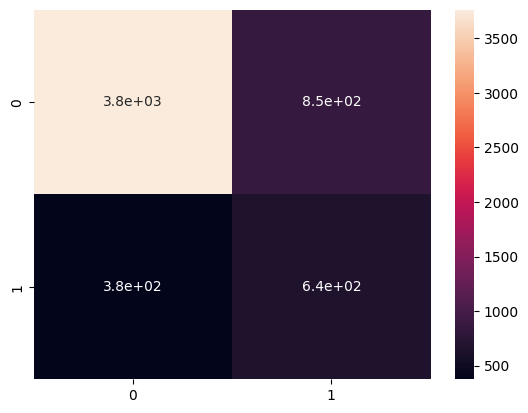

In [44]:
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show()